In [2]:
import os
import yaml
import random
import numpy as np
import matplotlib.pyplot as plt
from mdv.utils import *
from PIL import Image, ImageDraw
%matplotlib inline

args=dict()

In [3]:
dataset = '/media/dde/949A32029A31E202/MDV/dataset/first_dataset'

args['prod'] = '21'
args['point'] = '1'

args['pos_sample_ratio'] = 0.8      # POS 샘플에서 몇퍼센트의 이미지를 가져올지, 1이면 전부, 0.8은 80%

In [5]:
args['pos_case'] = os.path.join(dataset,args['prod'],args['point'],'OK')
args['ng_case'] = os.path.join(dataset,args['prod'],args['point'],'NG')
args['ng_case_ct'] = get_ng_case_ct(os.path.join(dataset),args)

width 240
height 240


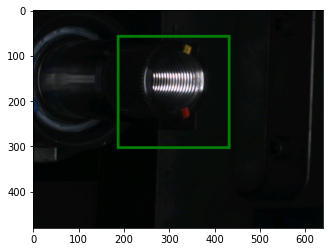

In [8]:
args['x1']=190
args['x2']=430
args['y1']=60
args['y2']=300


args['width']=args['x2']-args['x1']
args['height']=args['y2']-args['y1']

draw_single_img(args,args['pos_case'])
print('width',args['width'])
print('height',args['height'])

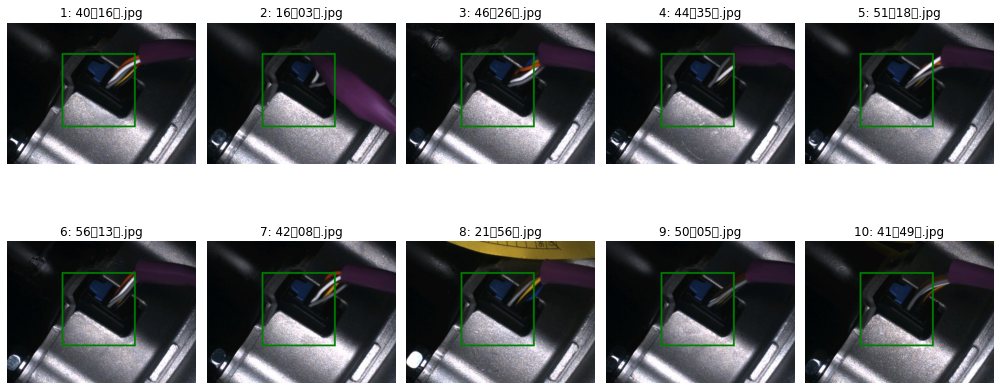

In [29]:
rows=2
cols=5
sample_ct=rows*cols

draw_multi_img(args,args['pos_case'],sample_ct,rows,cols)

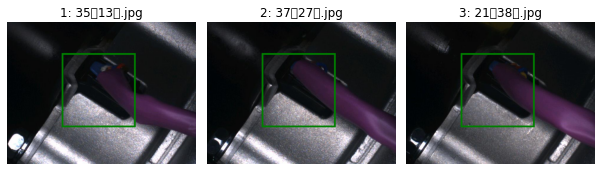

In [30]:
rows=1
cols=5
sample_ct=rows*cols

for ng_case_img_path in os.listdir(args['ng_case']):
    for img_list in os.listdir(args['ng_case']):
        draw_multi_img(args,os.path.join(args['ng_case'],img_list),sample_ct,rows,cols)


In [31]:
##################

In [32]:
##################

In [33]:
config_path = os.path.join(dataset,args['prod'],'roi_config')  

c_point=dict()
if args['ng_case_ct'] > 0:
    ng_case_list = list()
    for err_name in os.listdir(os.path.join(args['ng_case'])):
        ng_case_list.append(os.path.join(args['ng_case'],err_name))
    args['ng_case_list'] =  ng_case_list

else:
    args['ng_case_list'] = [args['ng_case']]

point = args['point']
args['valid_split_ratio'] = round(1.-args['pos_sample_ratio'],2)
del args['point']
del args['ng_case']
os.makedirs(config_path, exist_ok=True)
with open(os.path.join(config_path, 'roi_config_'+point+'.yaml'), 'w') as fp:
    c_prod=dict()
    c_prod[point]=args
    yaml.dump(c_prod, fp)
print(args['prod'], point, 'ROI 설정 완료') 

FE 6 ROI 설정 완료
